In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

endangered_languages = pd.read_csv(
    './data_sets/endangered_languages_final.csv', index_col=0)

In [2]:
endangered_languages.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [3]:
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, South Italian to Scanian
Data columns (total 12 columns):
Countries Where Spoken        2697 non-null object
Country Code                  2697 non-null object
Degree of Endangerment        2697 non-null object
Speakers                      2514 non-null float64
Latitude                      2694 non-null float64
Longitude                     2694 non-null float64
Fertility Rate Avg            2697 non-null float64
2018 Rank                     2097 non-null float64
2018 Score                    2097 non-null float64
2018 Band                     2097 non-null object
Number of Countries Spoken    2697 non-null int64
GDP Average (Current US $)    2697 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 273.9+ KB


# Exploring the Data
First let's get a description of each of the columns of my data set and then, we'll explore the data set by using a manual decision tree to drill down into the data. 
<ul>
<li>Index - Name of the language</li>
<li>Countries where spoken - Comma separated string of all the countries that language is known to be spoken in</li>
<li>Country Code - Alpha 3 country code (used this column to merge many of the disparate datasets)</li>
<li>Degree of Endangerment - Describes the level of danger the langauage is in</li>
<li>Speakers - Number of speakers for each langagues</li>
<li>Latitude - Latitudinal coordinate</li>
<li>Longitude - Longitudinal coordinate</li>
<li>Fertility Rate Avg. - Mean fertility rate for the country in the country code (1960 -2013)</li>
<li>2018 Rank - The rank 1 - 89 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Score - The score 100 - 0 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Band - Level of English proficiency for each country</li>
<li>Number of Countries Spoken - How many countries are/were speaking this language (It's the length of the Countries where Spoken column</li>
<li>GDP Avgerage (Current US $) - Mean GDP data from the world bank (1960 - 2017)</li>
</ul>

### First things first
Even in my cleaned data set there are still some missing values, so I've decided to drop the langauges with no known EF score (since being a country with high access to English is central to my hypothesis, I'm leaving those columns out for EDA purposes. I will be bringing them back for the ML model later on)

In [4]:
endangered_languages = endangered_languages.dropna()
# Now you can see all the missing values are gone
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, South Italian to Island Carib
Data columns (total 12 columns):
Countries Where Spoken        1931 non-null object
Country Code                  1931 non-null object
Degree of Endangerment        1931 non-null object
Speakers                      1931 non-null float64
Latitude                      1931 non-null float64
Longitude                     1931 non-null float64
Fertility Rate Avg            1931 non-null float64
2018 Rank                     1931 non-null float64
2018 Score                    1931 non-null float64
2018 Band                     1931 non-null object
Number of Countries Spoken    1931 non-null int64
GDP Average (Current US $)    1931 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 196.1+ KB


### 1. First split in the decision tree
I want to split the set into countries whose first langauage is English, that list includes the United States, Great Britan, Australia, Canada, New Zealand and Ireland) and coutnries whose native lanagues is something other than English

In [5]:
eng_speakers = endangered_languages[endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]
non_eng_speakers = endangered_languages[~endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]

### 2. Next fork in the road
Now let's separate the extinct languages (those with no speakers) from the still living langauges. In my ML model I will be using the extinct languages to test my predictions, but for now I'll separate them to perform different but still pertinent EDA on that set of the data

In [6]:
living_lang_eng = eng_speakers[eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_eng = eng_speakers[eng_speakers['Degree of Endangerment'] == 'Extinct']
living_lang_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] == 'Extinct']

### 3. Let's drill down even more!
Now that the dataset is esentially split into 4 groups, I'll leave the extinct languages to the side for now. (We'll come back to them later) I want to look deeper into the living langagues. The level of endangerment for each langague can be one of the following
<ul>
<li>Vulnerable</li>
<li>Defintely Endangered</li>
<li>Severly Endangered</li>
<li>Critically Endangered</li>
</ul>

I'd like to group them by their category and run some analysis on each of those mini data sets to see what information we might gather

In [7]:
# valueList = living_lang_eng['Degree of Endangerment'].unique()

# def lower_first(str):
#     str = str[0].lower() + str[1:]
#     return str

# for category in valueList:
# lower_first(category.split(' ')[0]) + '_eng' = living_lang_eng.groupby(['Degree of Endangerment']).get_group(category)

In [8]:
level = living_lang_eng.groupby(['Degree of Endangerment'])

vulnerable_eng = level.get_group('Vulnerable')
definitely_eng = level.get_group('Definitely endangered')
severly_eng = level.get_group('Severely endangered')
critically_eng = level.get_group('Critically endangered')

And let's do the same for non_eng langagues

In [9]:
level2 = living_lang_non_eng.groupby(['Degree of Endangerment'])

vulnerable_non = level2.get_group('Vulnerable')
definitely_non = level2.get_group('Definitely endangered')
severly_non = level2.get_group('Severely endangered')
critically_non = level2.get_group('Critically endangered')

## Now for some EDA
Let's take a look at the distribution of a couple of factors. 
<ol>
<li>The number of speakers for each of these categories</li>
<li>Their EF English score (for non-english countries)</li>
<li>The average GDP for the countries</li>
<li>The average fertility rate of the countries</li>
</ol>

### Vulnerable languages from English Speaking Countries

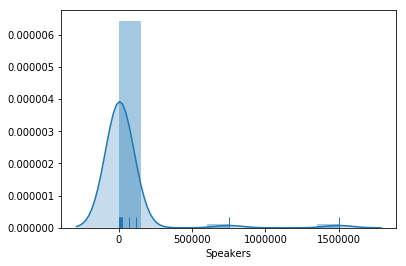

In [10]:
v_eng = sns.distplot(vulnerable_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

As we can see, there are some languages with well over 500,000 speakers which prevents us from being able to really get a fell for the distribution of vulnerable langauges. Let's filter that

In [11]:
vulnerable_eng_no_outliers = vulnerable_eng[vulnerable_eng['Speakers'] < 2500]

Taking out some of the outliers such as Welsh and Scottish as they just skew the data and one could argue with that many speakers, the language while vulnerable is nowhere nead the danger of the other langagues here

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Endangered Langauages from Eng. Speaking Countries')]

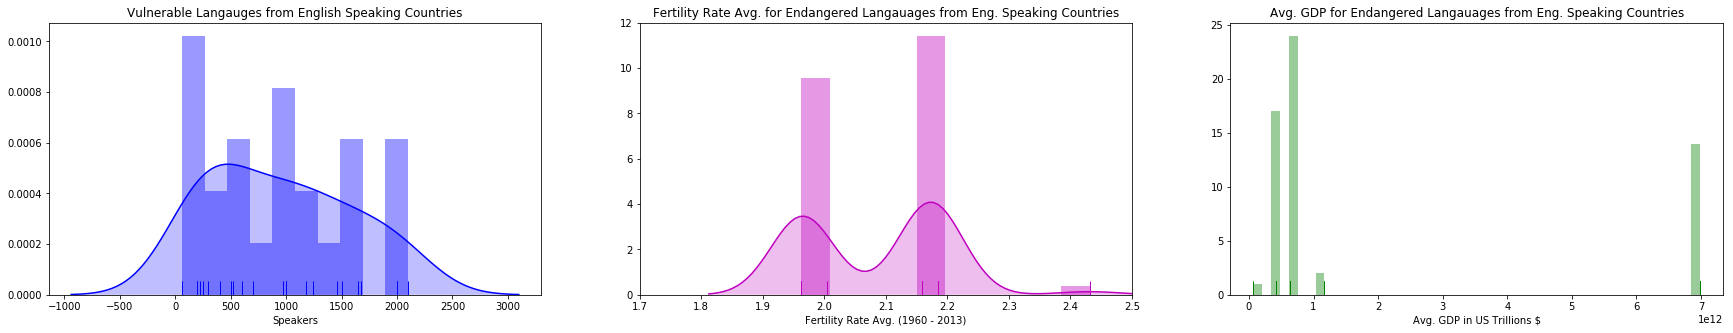

In [59]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(vulnerable_eng_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax0, color='b')
ax0.set(title='Vulnerable Langauges from English Speaking Countries')

sns.distplot(vulnerable_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax1, color='m')
ax1.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.7, 2.5), 
        title='Fertility Rate Avg. for Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp = vulnerable_eng['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp, bins=50, hist=True, kde=False, rug=True, kde_kws={'shade': True}, ax=ax2, color='g')
ax2.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

The three charts about represent a distribution of data in the vulnerable langauges from English speaking countries data subset. We can tell that the majority of these langagues have under 2500 speakers. The fertility rate is low in these countries which could mean less children to carry on the language and being from countries where English is the native language, children may be encouraged to speak English from an early age (at least in schools to aviod ridicule and shame). The GDP is on average pretty high as well with the US taking in about 7 trillion per year. I will run the same analysis on the other data subsets for English speaking countries. (Definitely, Severly and Critically Endangered)

### Definitely Endangered languages from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Definitely Endangered Langauages from Eng. Speaking Countries')]

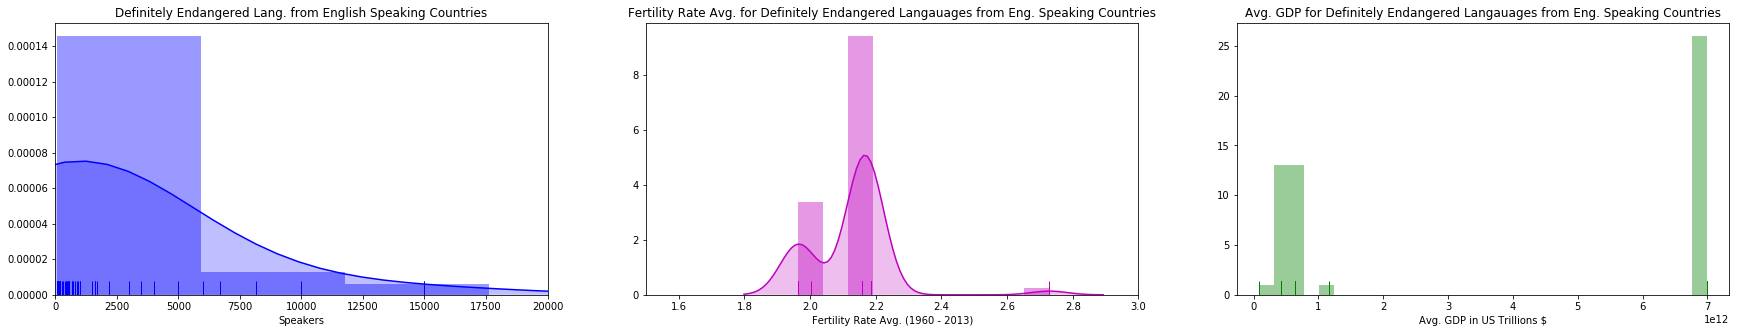

In [60]:
fig, (ax3, ax4, ax5) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(definitely_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax3, color='b')
ax3.set(title='Definitely Endangered Lang. from English Speaking Countries', xlim=(0, 20000))

sns.distplot(definitely_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax4, color='m')
ax4.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.5, 3), 
        title='Fertility Rate Avg. for Definitely Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp2 = definitely_eng['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp2, bins=30, hist=True, kde=False, rug=True, kde_kws={'shade': True}, ax=ax5, color='g')
ax5.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Definitely Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### Severely Endangered languages from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Endangered Langauages from Eng. Speaking Countries')]

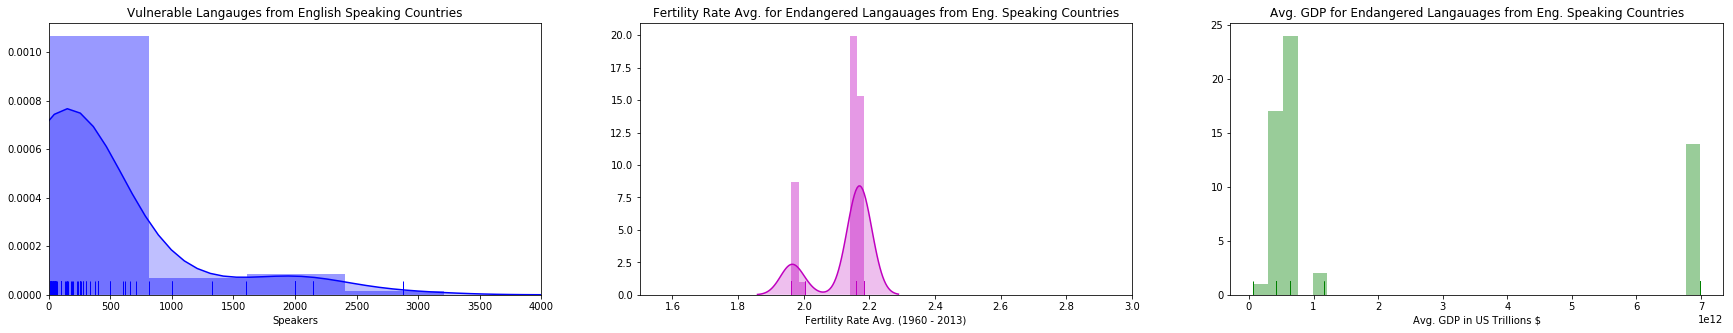

In [63]:
fig, (ax6, ax7, ax8) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(severly_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax6, color='b')
ax6.set(title='Vulnerable Langauges from English Speaking Countries', xlim=(0, 4000))

sns.distplot(severly_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax7, color='m')
ax7.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.5, 3), 
        title='Fertility Rate Avg. for Severely Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp3 = severly_eng['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp, bins=30, hist=True, kde=False, rug=True, kde_kws={'shade': True}, ax=ax8, color='g')
ax8.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Severly Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### Critically Endangered Langauges from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Critically Endangered Langauages from Eng. Speaking Countries')]

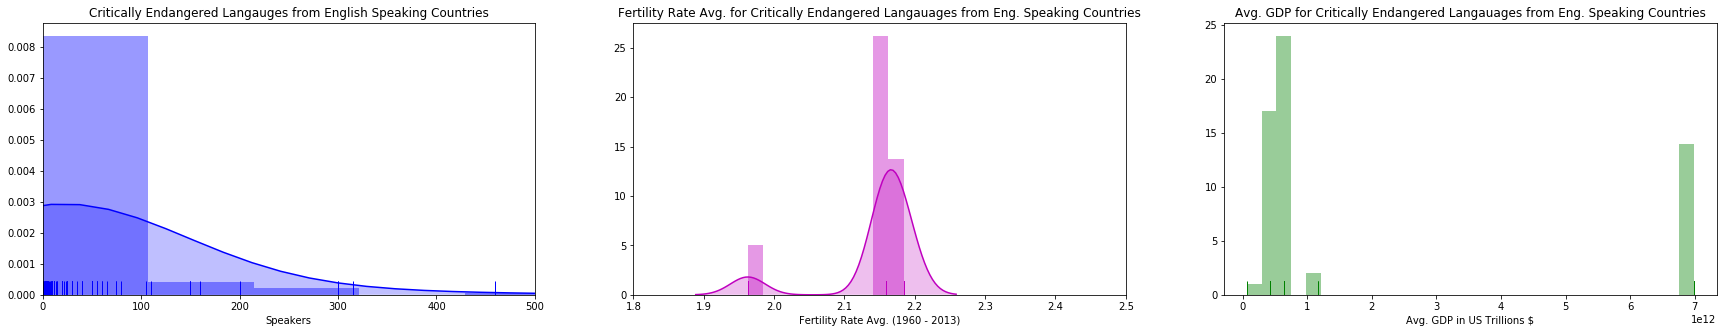

In [78]:
fig, (ax9, ax10, ax11) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(critically_eng['Speakers'], bins=20, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax9, color='b')
ax9.set(title='Critically Endangered Langauges from English Speaking Countries', xlim=(0, 500))

sns.distplot(critically_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax10, color='m')
ax10.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.8, 2.5), 
        title='Fertility Rate Avg. for Critically Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp3 = severly_eng['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp, bins=30, hist=True, kde=False, rug=True, kde_kws={'shade': True}, ax=ax11, color='g')
ax11.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Critically Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### What could these insights mean?
At least from early EDA, looks like between the English speaking countries, the more endangered the language the less the speakers. The same can be looked at for non English speaking countries, which we look at in a few. Let's look to see if there's any correlation between speakers/fertility rate and speakers/GDP for these countries

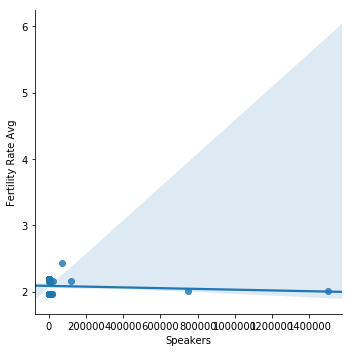

In [82]:
sns.lmplot(x='Speakers', y='Fertility Rate Avg', data=vulnerable_eng, sharex=False, sharey=False)

### Vulnerable languages from Non English Speaking Countries

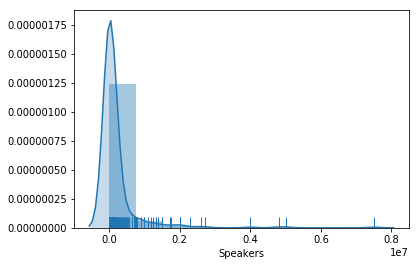

In [15]:
v_non = sns.distplot(vulnerable_non['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

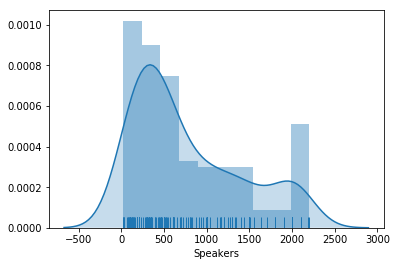

In [16]:
vulnerable_non_no_outliers = vulnerable_non[vulnerable_non['Speakers'] < 2500]
v_non2 = sns.distplot(vulnerable_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

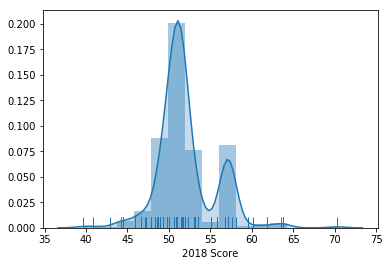

In [17]:
v_non3 = sns.distplot(vulnerable_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True})

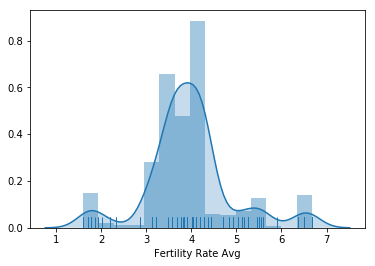

In [18]:
v_non4 = sns.distplot(vulnerable_non['Fertility Rate Avg'], bins=15, kde=True, rug=True, kde_kws={'shade': True})

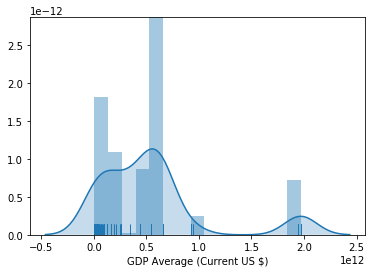

In [19]:
int_gdp2 = vulnerable_non['GDP Average (Current US $)'].astype(int)
v_non5 = sns.distplot(int_gdp2, bins=15, kde=True, rug=True, kde_kws={'shade': True})

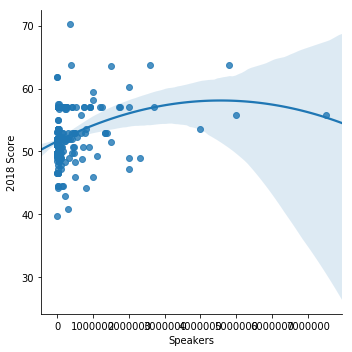

In [98]:
v_non6 = sns.lmplot(x='Speakers', y='2018 Score', data=vulnerable_non, order=2)
# pass an order argument greater than 2 for polynomial

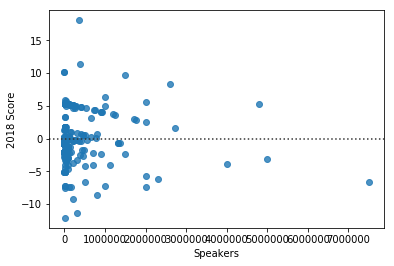

In [100]:
sns.residplot(data=vulnerable_non, x='Speakers', y='2018 Score')
# the data should be represented randonly across the residual line, if there is some curve or shape that may suggest a
# non linear model would be a good choice to analyze it

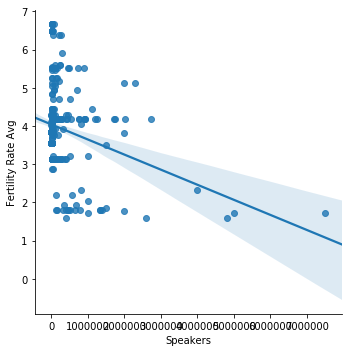

In [72]:
v_non7 = sns.lmplot(x='Speakers', y='Fertility Rate Avg', data=vulnerable_non)

# Trying stuff out

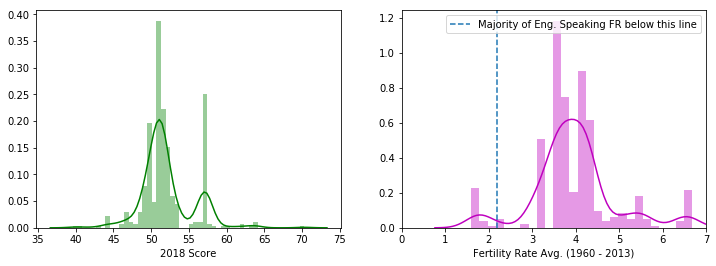

In [32]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,
                               sharey=False, figsize=(12,4))
sns.distplot(vulnerable_non['2018 Score'], ax=ax0, color='g')
sns.distplot(vulnerable_non['Fertility Rate Avg'], ax=ax1, color='m')
ax1.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(0, 7))
ax1.axvline(x=2.2, label='Majority of Eng. Speaking FR below this line', linestyle='--')
ax1.legend()

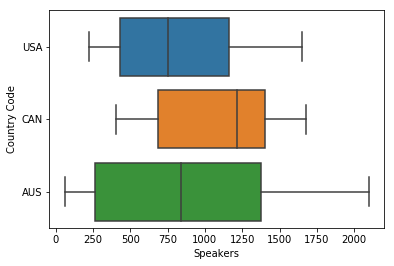

In [84]:
sns.boxplot(data=vulnerable_eng_no_outliers, y="Country Code",
            x="Speakers")

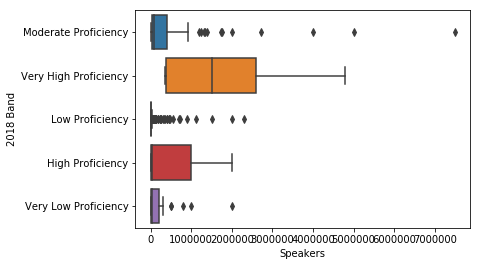

In [90]:
sns.boxplot(data=vulnerable_non, y="2018 Band",
            x="Speakers")

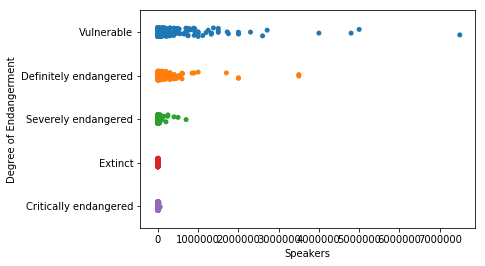

In [88]:
sns.stripplot(data=endangered_languages, y="Degree of Endangerment",
            x="Speakers", jitter=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

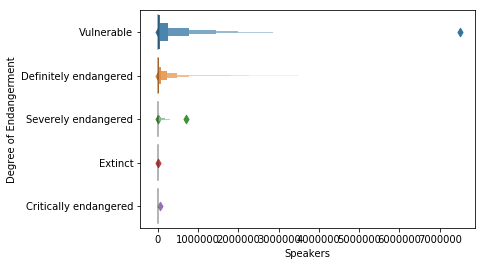

In [92]:
sns.boxenplot(data=endangered_languages, y='Degree of Endangerment', x='Speakers')

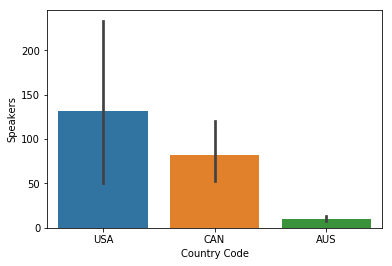

In [94]:
sns.barplot(data=critically_eng, x='Country Code', y='Speakers')

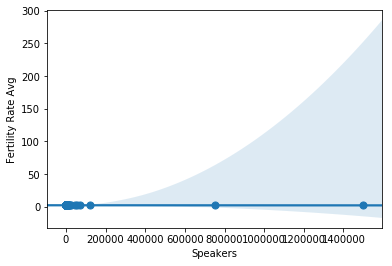

In [106]:
import numpy as np
sns.regplot(data=eng_speakers, x='Speakers', y='Fertility Rate Avg', x_jitter=.1, order=2, x_estimator=np.mean)

# End Trying Stuff Out

## How about those languages that have gone extinct?
Let's see if we can find any trends there. I wonder what's the average fertility rate of these langagues

In [109]:
fr_eng_x = extinct_eng['Fertility Rate Avg'].mean()

fr_non_x = extinct_non_eng['Fertility Rate Avg'].mean()
print('The average Fertility Rate for extinct langagues from non English speaking countries is {0}, while the rate is {1} for English speaking countries'.format(fr_non_x, fr_eng_x) )

The average Fertility Rate for extinct langagues from non English speaking countries is 3.561011247456248, while the rate is 2.1590197431302274 for English speaking countries


#### What about GDP?

In [112]:
from utils.human_readable_numbers import millify
gdp_eng_x = extinct_eng['GDP Average (Current US $)'].astype(int).mean()
gdp_non_x = extinct_non_eng['GDP Average (Current US $)'].astype(int).mean()

print('The avg GDP for extinct languages from non English speaking countires is {}'.format(millify(gdp_non_x)))
print('The avg GDP for extinct languages from English speaking countires is {}'.format(millify(gdp_eng_x)))

The avg GDP for extinct languages from non English speaking countires is 492 Billion
The avg GDP for extinct languages from English speaking countires is 6 Trillion


#### And just how far is the langague spead?
Meaning, how many countries is this language spoken in? Is it located in just one country or many around the globe

In [114]:
max_eng = extinct_eng['Number of Countries Spoken'].max()
min_eng = extinct_eng['Number of Countries Spoken'].min()
max_non = extinct_non_eng['Number of Countries Spoken'].max()
min_non = extinct_non_eng['Number of Countries Spoken'].min()

print('The spread of extinct langagues from English speaking countries is from {0} to {1}'.format(min_eng, max_eng))
print('The spread of extinct langagues from non English speaking countries is from {0} to {1}'.format(min_non, max_non))

The spread of extinct langagues from English speaking countries is from 1 to 1
The spread of extinct langagues from non English speaking countries is from 1 to 3


#### What can we gather from these extinct languages?

Well, early EDA can show that non English speaking countries whose langagues have gone extinct show the language is more spread out (perhaps leading to it's extinction). While contradicting my original hypothesis, the non English speaking countries also have higher fertility rate which means more children, however that may have more to do with their average GDP which is lower than English speaking countries. Let's see a count to see how many documented extinct languages we have in each case

In [115]:
extinct_eng.count()

Countries Where Spoken        62
Country Code                  62
Degree of Endangerment        62
Speakers                      62
Latitude                      62
Longitude                     62
Fertility Rate Avg            62
2018 Rank                     62
2018 Score                    62
2018 Band                     62
Number of Countries Spoken    62
GDP Average (Current US $)    62
dtype: int64

In [116]:
extinct_non_eng.count()

Countries Where Spoken        130
Country Code                  130
Degree of Endangerment        130
Speakers                      130
Latitude                      130
Longitude                     130
Fertility Rate Avg            130
2018 Rank                     130
2018 Score                    130
2018 Band                     130
Number of Countries Spoken    130
GDP Average (Current US $)    130
dtype: int64

In [120]:
import mpl_toolkits

In [124]:
from mpl_toolkits import *

In [126]:
m

AttributeError: module 'mpl_toolkits' has no attribute 'Basemap'